# Library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Input 

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- customerID
- gender
- SeniorCitizen (`1` for `Senior Citizen` and `0` for `Not Senior Citizen`)
- Partner - the customer has a partner or not (Yes, No)
- Dependents - the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - the customer has a phone service or not (Yes, No)
- MultipleLines - the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - the customer has device protection or not (Yes, No, No internet service)
- TechSupport - the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

In [3]:
#Exclude rows with TotalCharge column contains white space
df=df.loc[~df['TotalCharges'].str.contains(' ')]

#Transform TotalCharges col to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observation:
1. The data has 21 Columns and 7032 Rows
2. There is 6 columns has same values `Yes, No, No Internet` and relationship with `InternetService`:
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

# Data Cleaning

## Missing Values

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There is no missing value

## Duplicated Data

In [6]:
df.duplicated().sum()

0

- Zero duplicated data

# Data Under Standing

## Statistical summary

In [7]:
numerical=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

categorical=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
             'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
categorical_internet=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies']

In [8]:
#Numerical Columns
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
1. `SeniorCitizen` is boolean column, no need to conclude its simmetricity.
2. The Minimum and Maximum values of all columns are normal.
3. `tenure` and `TotalCharges` has skewed distribution (10% mean > median).
4. `MonthlyCharges` is pretty skewed.

In [9]:
#Categorical Columns
df[categorical].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,2,4,2
top,Male,No,No,Yes,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3875,4168,2365,5163


Observation:
- Most of cutomer is Male
- Average of customer status is no partner and no dependents
- 90% of costumer has a phone service
- Electronic Check is one of favorite customer to pay the bill
- 80% from 7000 customer still in our provider

In [10]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Observation:
- Almost half the contract term of cutomer is Month to Month
- 25% is Two Year and One Year contract
- In the second position is Two Year Contract

In [11]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Observation:
- 40% of customer Payment Method is Electronic Check
- Mailed Check, Bank Transfer, Credit Card method each of them has 20% customer that is choose it
- Mailed Check is Second position with 1604 customer

In [12]:
#Internet Relationship Column
df[categorical_internet].describe()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7032,7032,7032,7032,7032,7032,7032
unique,3,3,3,3,3,3,3
top,Fiber optic,No,No,No,No,No,No
freq,3096,3497,3087,3094,3472,2809,2781


Observation:
- Almost 50% of customer does'nt take security offer `Online Security`, `Online Backup`, and `Device Protection`
- And 2800 customer does'nt take Internet streaming offer like `Streaming TV` and `Streaming Movies`

In [13]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Observation:
- 20% of Customer does'nt take Internet Sevice
- Fiber Optic is the top Internet Service, with 3100 customer who chooses it because DSL has very limited upstream bandwidth

## Univariate Analysis

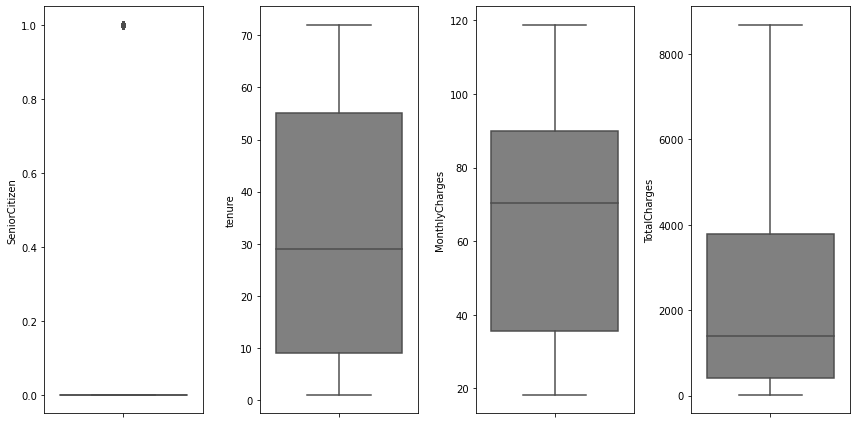

In [14]:
#Detect Out Liers
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='gray')
    plt.tight_layout()

In [15]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Observation:
- `SeniorCitizen` is boolean column 1 for `yes` and 0 for `no`, so that is not real outliear
- 5890 or 80% customer is not Senior Citizen

## Knowing Distribution Form

### Numerical Data

C:\Users\kunca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kunca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kunca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

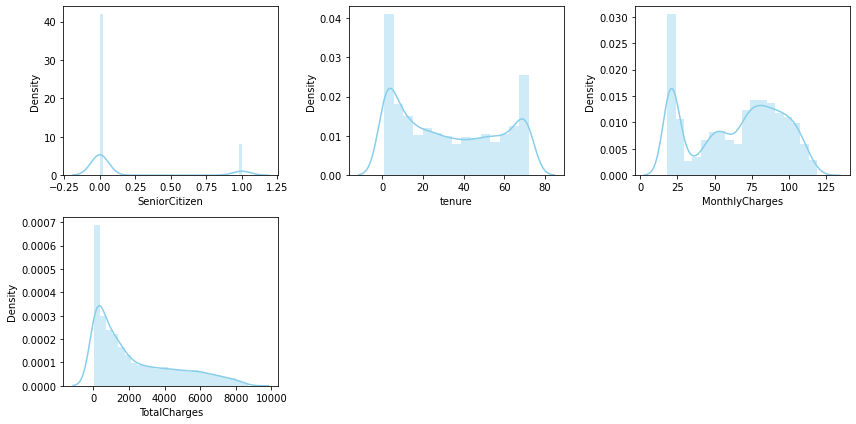

In [16]:
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
- There is no Symmetric distribution here.
- All of the columns are asymmetrical.

### Categorical Data

<AxesSubplot:xlabel='InternetService', ylabel='count'>

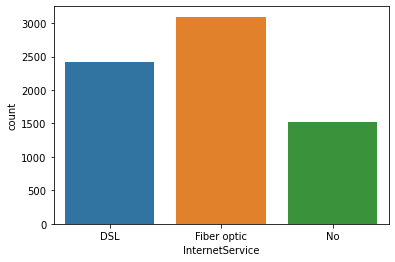

In [17]:
sns.countplot(x=df['InternetService'])

Observation:
- 20% of Customer not using Internet Service

# Bivariate Analysis

<AxesSubplot:xlabel='InternetService', ylabel='count'>

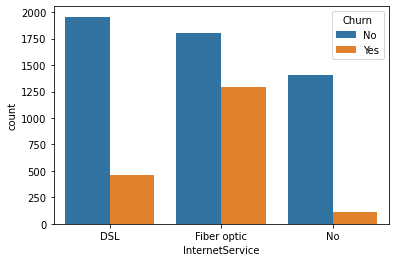

In [18]:
#Is Customer who doesn't use Internet Churn?
sns.countplot(data=df,
             x='InternetService',
             hue='Churn')

Observation:
- Not using Internet doesn't affect customer to churn.

# Multivariate Analysis

<AxesSubplot:>

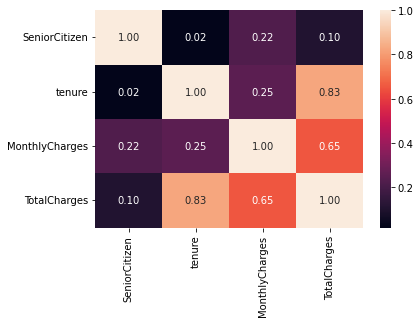

In [19]:
#Corelation HeatMap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
- Long Tenure makes bigger Total Charge 
- Monthly Charges play in role increasing Total Charges

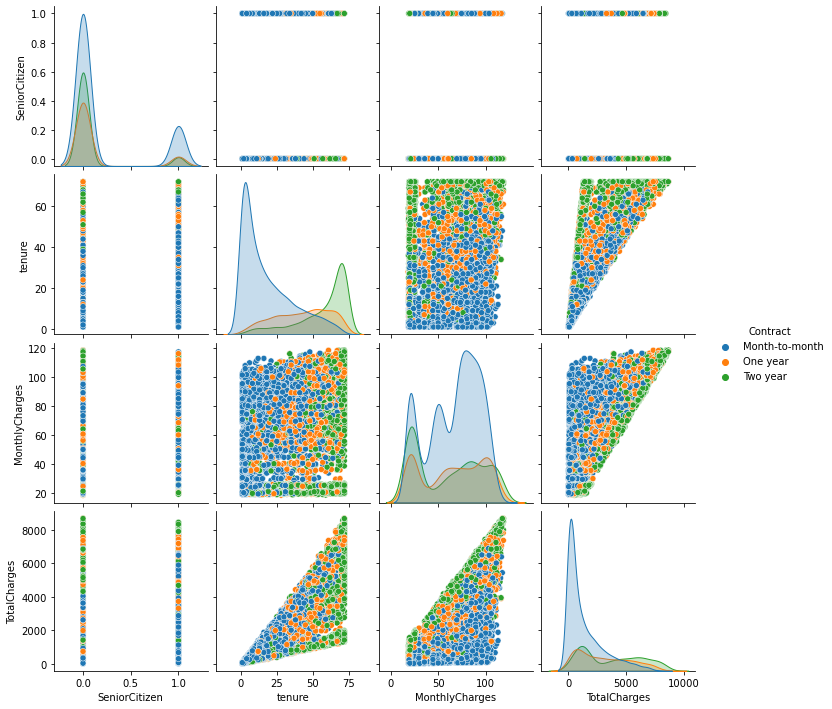

In [20]:
#Pairplot
sns.pairplot(df, hue='Contract')

Observation:
- Average Customer with One Year and Two Year contract has long tenure.
- Senior Citizen is minority customer in this Telco provider, considering the current work that has started WFH and is dominated by the younger generation.

# EDA Questions

1. How much customer must to pay for using streaming videos service?
2. Is 2 year contract cheaper than month to month contract? If customer using Internet fiber without choosing any of the security offer or streaming offer.

## 1.How much customer must to pay for using streaming videos service?

In [21]:
soal1=df[(df['OnlineBackup']=='No')&(df['OnlineSecurity']=='No')&(df['DeviceProtection']=='No')&(df['TechSupport']=='No')&
   (df['StreamingTV']=='No')&(df['StreamingMovies'].isin(['Yes','No']))&(df['tenure']<=12)&
    (df['Contract'].str.contains('Month'))&(df['InternetService'].isin(['DSL','FiberOptic']))].reset_index()

In [22]:
soal1

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
1,105,6180-YBIQI,Male,0,No,No,5,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,24.30,100.20,No
2,133,3091-FYHKI,Male,0,No,No,1,No,No phone service,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,Yes
3,134,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Electronic check,44.35,81.25,Yes
4,147,2135-RXIHG,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,6899,3926-CUQZX,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.10,45.10,Yes
254,6932,0463-ZSDNT,Male,0,No,No,10,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),56.75,503.25,No
255,6955,5392-AKEMH,Female,0,No,No,12,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.05,523.10,No
256,6979,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No


In [23]:
soal1.groupby(['InternetService','StreamingMovies']).agg(total_spend=('MonthlyCharges','mean'))

total_spend
InternetService StreamingMovies             
DSL             No                 40.503556
                Yes                48.543939

Observation:
- Customer pay 8 USD to using Streaming Movies service.

## 2. Is 2 year contract cheaper than month to month contract? If customer using Internet fiber without choosing any of the security offer or streaming offer. 

In [24]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [25]:
soal2=df[(df['OnlineBackup']=='No')&(df['OnlineSecurity']=='No')&(df['DeviceProtection']=='No')&(df['TechSupport']=='No')&
   (df['StreamingTV']=='No')&(df['StreamingMovies']=='No')&
    (df['InternetService'].str.contains('Fiber'))].reset_index()
soal2

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
1,36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
2,113,4846-WHAFZ,Female,1,Yes,No,37,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes
3,122,0404-SWRVG,Male,0,No,No,3,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,Yes
4,139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
395,7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
396,7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
397,7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No


In [26]:
soal2.pivot_table(index='Contract',
              values= 'MonthlyCharges',
              aggfunc='mean')

,MonthlyCharges
Contract,
Month-to-month,72.076343
One year,72.410000
Two year,71.683333


Observation:
- Two Year contract 1 USD cheaper than Month to Month contract